# Projet M2 option Robot Enseirb/ENSC 2021-2022

#### 1.a.Retrouver les angles manquants

Montrer qu’on a bien appris les positions (statiques) et qu’on est capable de reconstruire les angles manquants pour une personne amputée, à partir des angles de son épaule et de la position (désirée) de sa main:

En entrée: shPitch, shRoll, handRemapPosX, handRemapPosY, handRemapPosZ handRemapPitch, handRemapRoll, handRemapYaw

En sortie: armYaw, elbPitch, forearmYaw, wriPitch, wriRoll

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading the datasets

In [4]:
data = pd.read_csv("corpus_students_all_targets_not_all_remap.csv")
data1 = data[['subjectId','shPitch', 'shRoll', 'handRemapPosX', 'handRemapPosY', 'handRemapPosZ', 'handRemapPitch', 'handRemapRoll', 'handRemapYaw']]
data1.head()

,subjectId,shPitch,shRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll,handRemapYaw
0,10,-0.207269,-0.139305,0.104115,-0.427305,0.341101,0.291809,-0.746049,2.940466
1,10,-0.208174,-0.139678,0.104262,-0.427390,0.341057,0.292196,-0.745820,2.940240
2,10,-0.208109,-0.139475,0.104394,-0.427472,0.341001,0.292807,-0.746017,2.939764
3,10,-0.208239,-0.139492,0.104292,-0.427450,0.341244,0.292540,-0.747592,2.939619
4,10,-0.208122,-0.139372,0.104338,-0.427519,0.341210,0.292919,-0.748280,2.939204


In [5]:
print(data1.describe())

          subjectId       shPitch        shRoll  handRemapPosX  handRemapPosY  \
count  1.199469e+06  1.199469e+06  1.199469e+06  881699.000000  881699.000000   
mean   1.659288e+01 -1.014769e+00 -6.802246e-01      -0.100597      -0.002894   
std    1.061839e+01  6.420410e-01  3.282745e-01       0.188778       0.199470   
min    3.000000e+00 -3.141206e+00 -1.560359e+00      -0.605567      -0.552436   
25%    7.000000e+00 -1.458154e+00 -9.176978e-01      -0.237241      -0.156831   
50%    1.300000e+01 -9.677788e-01 -6.977132e-01      -0.097061      -0.015434   
75%    2.900000e+01 -5.447325e-01 -4.567151e-01       0.036210       0.141803   
max    3.200000e+01  3.140231e+00  5.016207e-01       0.445426       0.564953   

       handRemapPosZ  handRemapPitch  handRemapRoll   handRemapYaw  
count  881699.000000   881699.000000  881699.000000  881699.000000  
mean        0.388386        0.040098      -0.283023       0.090169  
std         0.086133        0.657416       0.553919       2.850

In [6]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199469 entries, 0 to 1199468
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   subjectId       1199469 non-null  int64  
 1   shPitch         1199469 non-null  float64
 2   shRoll          1199469 non-null  float64
 3   handRemapPosX   881699 non-null   float64
 4   handRemapPosY   881699 non-null   float64
 5   handRemapPosZ   881699 non-null   float64
 6   handRemapPitch  881699 non-null   float64
 7   handRemapRoll   881699 non-null   float64
 8   handRemapYaw    881699 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 82.4 MB
None


### Training and testing Data

In [7]:
data2=data.dropna()
data_X=data2.loc[:, ['shPitch', 'shRoll','handRemapPosX', 'handRemapPosY', 'handRemapPosZ', 'handRemapPitch', 'handRemapRoll', 'handRemapYaw']]
data_y=data2.loc[:, ['armYaw', 'elbPitch', 'forearmYaw', 'wriPitch', 'wriRoll']]
X_train, X_test, y_train, y_test= train_test_split(data_X, data_y, test_size=0.3,random_state=42)

### 1. DecisionTreeRegressor model

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regr = DecisionTreeRegressor(max_depth=20)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [10]:
print(y_test.loc[[0]])
acc = regr.score(X_train, y_train)
print(f"Training accuracy: {acc:.5f}")
print( regr.predict(X_test.loc[[0]]))

     armYaw  elbPitch  forearmYaw  wriPitch   wriRoll
0  0.590163 -1.124028    0.437425 -0.172744 -0.316933
Training accuracy: 0.99452
[[ 0.59045173 -1.12358474  0.43873296 -0.17093726 -0.31551723]]


In [11]:
predictions = regr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

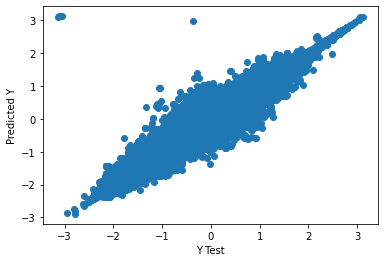

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the model

In [13]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))



RMSE: 0.063019528144168
MAE: 0.023342499921872716
MSE: 0.003971460927513583


### 2. Linear regression Model

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

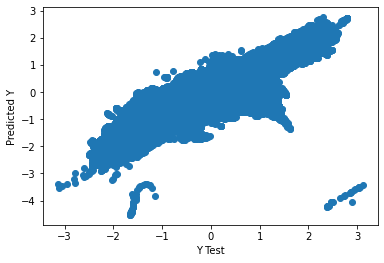

In [16]:
predictions_lr = lr.predict(X_test)
plt.scatter(y_test,predictions_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))

RMSE: 0.24662295424705521
MAE: 0.17951408886574208
MSE: 0.060822881561545084


## Conclusion